In [161]:
import os
import pymysql

connection = pymysql.connect(host='localhost',
                            user=os.getenv('CF_DB_USER', 'root'),
                            password=os.getenv('MYSQL_PASS', 'pass'),
                            db=os.getenv('CF_DB', 'testcf'),
                            charset='utf8mb4',
                            cursorclass=pymysql.cursors.DictCursor)

In [162]:
connection.commit()
cur = connection.cursor()
cur.execute('show tables')

11

In [163]:
rows = cur.fetchall()
rows

[{'Tables_in_testcf': 'acceptance'},
 {'Tables_in_testcf': 'competition'},
 {'Tables_in_testcf': 'file'},
 {'Tables_in_testcf': 'modification'},
 {'Tables_in_testcf': 'participant'},
 {'Tables_in_testcf': 'participantsolved'},
 {'Tables_in_testcf': 'participantsubmission'},
 {'Tables_in_testcf': 'problem'},
 {'Tables_in_testcf': 'problemeditdistance'},
 {'Tables_in_testcf': 'problemstatistics'},
 {'Tables_in_testcf': 'submissiondistance'}]

In [164]:
sentence = """
select *
from ((select * from modification where problem_id='213B') mdf)
inner join participant on mdf.user_name = participant.user_name
inner join acceptance on mdf.problem_id = acceptance.problem_id
"""
cur.execute(sentence)
rows = cur.fetchall()

In [165]:
rows

[{'acceptance.problem_id': '213B',
  'acceptance_rate': 0.37914485165794065,
  'block_type': 'function',
  'during_competition': 0,
  'file_name': '.888_18918205_213.src',
  'idx': '189182050100000',
  'lastmodified': datetime.date(2017, 2, 1),
  'max_rating': 1505,
  'modification_type': 'INS',
  'node_type': 'expr_stmt',
  'parent_type': 'block',
  'participant.user_name': '.888',
  'problem_id': '213B',
  'rating': 1502,
  'solved': 869,
  'solved_in_sample': 38,
  'submission': 2292,
  'submission_in_sample': 103,
  'user_name': '.888'},
 {'acceptance.problem_id': '213B',
  'acceptance_rate': 0.37914485165794065,
  'block_type': 'function',
  'during_competition': 0,
  'file_name': '.888_18918205_213.src',
  'idx': '189182050100001',
  'lastmodified': datetime.date(2017, 2, 1),
  'max_rating': 1505,
  'modification_type': 'INS',
  'node_type': 'macro',
  'parent_type': 'block',
  'participant.user_name': '.888',
  'problem_id': '213B',
  'rating': 1502,
  'solved': 869,
  'solved_i

In [166]:
cur.execute("select * from modification where problem_id='213B'")
df_mdf = cur.fetchall()
cur.execute("select * from participant")
df_user = cur.fetchall()
cur.execute("select * from acceptance")
df_acc = cur.fetchall()

In [167]:
df_mdf

[{'block_type': 'unit',
  'during_competition': 0,
  'file_name': 'pparwal12_18131109_213.src',
  'idx': '181311090100000',
  'modification_type': 'INS',
  'node_type': 'comment',
  'parent_type': 'unit',
  'problem_id': '213B',
  'user_name': 'pparwal12'},
 {'block_type': 'unit',
  'during_competition': 0,
  'file_name': 'behnood_18144976_213.src',
  'idx': '181449760100000',
  'modification_type': 'INS',
  'node_type': 'decl',
  'parent_type': 'decl_stmt',
  'problem_id': '213B',
  'user_name': 'behnood'},
 {'block_type': 'unit',
  'during_competition': 0,
  'file_name': 'behnood_18144976_213.src',
  'idx': '181449760100001',
  'modification_type': 'INS',
  'node_type': 'type',
  'parent_type': 'decl',
  'problem_id': '213B',
  'user_name': 'behnood'},
 {'block_type': 'unit',
  'during_competition': 0,
  'file_name': 'behnood_18144976_213.src',
  'idx': '181449760100002',
  'modification_type': 'INS',
  'node_type': 'name',
  'parent_type': 'decl',
  'problem_id': '213B',
  'user_nam

In [168]:
df_user

[{'max_rating': 1617, 'rating': 1471, 'user_name': '-77-'},
 {'max_rating': 1405, 'rating': 1152, 'user_name': '-Ahmed'},
 {'max_rating': 1379, 'rating': 1379, 'user_name': '-albus-'},
 {'max_rating': 1377, 'rating': 991, 'user_name': '-burn3r-'},
 {'max_rating': 1379, 'rating': 1377, 'user_name': '-CoDeR-'},
 {'max_rating': 1770, 'rating': 1770, 'user_name': '-Djok'},
 {'max_rating': 2459, 'rating': 2308, 'user_name': '-DMYTRO-'},
 {'max_rating': 1378, 'rating': 1064, 'user_name': '-GANIBAL-'},
 {'max_rating': 1824, 'rating': 1785, 'user_name': '-Modi-'},
 {'max_rating': 1661, 'rating': 1471, 'user_name': '-NOOB-'},
 {'max_rating': 1380, 'rating': 1294, 'user_name': '-RC'},
 {'max_rating': 2238, 'rating': 2172, 'user_name': '-Secta-'},
 {'max_rating': 1416, 'rating': 1302, 'user_name': '-TOPCODER-'},
 {'max_rating': 2314, 'rating': 2235, 'user_name': '-Wave-'},
 {'max_rating': 2941, 'rating': 2698, 'user_name': '-XraY-'},
 {'max_rating': 1396, 'rating': 1396, 'user_name': '...........

In [169]:
df_acc

[{'acceptance_rate': 0.26022304832713755,
  'lastmodified': datetime.date(2017, 2, 1),
  'problem_id': '100A',
  'solved': 280,
  'solved_in_sample': 3,
  'submission': 1076,
  'submission_in_sample': 10},
 {'acceptance_rate': 0.24195804195804196,
  'lastmodified': datetime.date(2017, 2, 1),
  'problem_id': '100B',
  'solved': 173,
  'solved_in_sample': 1,
  'submission': 715,
  'submission_in_sample': 12},
 {'acceptance_rate': 0.3684210526315789,
  'lastmodified': datetime.date(2017, 2, 1),
  'problem_id': '100C',
  'solved': 252,
  'solved_in_sample': 3,
  'submission': 684,
  'submission_in_sample': 7},
 {'acceptance_rate': 0.5,
  'lastmodified': datetime.date(2017, 2, 1),
  'problem_id': '100D',
  'solved': 157,
  'solved_in_sample': 1,
  'submission': 314,
  'submission_in_sample': 2},
 {'acceptance_rate': 0.39622641509433965,
  'lastmodified': datetime.date(2017, 2, 1),
  'problem_id': '100E',
  'solved': 105,
  'solved_in_sample': 1,
  'submission': 265,
  'submission_in_sample'

In [6]:
cur.execute('select * from modification limit 100')
rows = cur.fetchall()

In [7]:
rows

[{'during_competition': 0,
  'file_name': 'Tanmoy_26049_17974710_621.src',
  'idx': '179747100100000',
  'modification_type': 'INS',
  'node_type': 'else',
  'parent_type': 'if',
  'problem_id': '-',
  'user_name': 'Tanmoy_26049'},
 {'during_competition': 0,
  'file_name': 'Tanmoy_26049_17974710_621.src',
  'idx': '179747100100001',
  'modification_type': 'INS',
  'node_type': 'block',
  'parent_type': 'else',
  'problem_id': '-',
  'user_name': 'Tanmoy_26049'},
 {'during_competition': 0,
  'file_name': 'Tanmoy_26049_17974710_621.src',
  'idx': '179747100100002',
  'modification_type': 'INS',
  'node_type': 'expr_stmt',
  'parent_type': 'block',
  'problem_id': '-',
  'user_name': 'Tanmoy_26049'},
 {'during_competition': 0,
  'file_name': 'Tanmoy_26049_17974710_621.src',
  'idx': '179747100100003',
  'modification_type': 'INS',
  'node_type': 'expr',
  'parent_type': 'expr_stmt',
  'problem_id': '-',
  'user_name': 'Tanmoy_26049'},
 {'during_competition': 0,
  'file_name': 'Tanmoy_2604

In [8]:
def exec_sql(command):
    cur.execute(command)
    return cur.fetchall()

In [9]:
import pandas as pd
df = pd.DataFrame(rows)
df

,during_competition,file_name,idx,modification_type,node_type,parent_type,problem_id,user_name
0,0,Tanmoy_26049_17974710_621.src,179747100100000,INS,else,if,-,Tanmoy_26049
1,0,Tanmoy_26049_17974710_621.src,179747100100001,INS,block,else,-,Tanmoy_26049
2,0,Tanmoy_26049_17974710_621.src,179747100100002,INS,expr_stmt,block,-,Tanmoy_26049
3,0,Tanmoy_26049_17974710_621.src,179747100100003,INS,expr,expr_stmt,-,Tanmoy_26049
4,0,Tanmoy_26049_17974710_621.src,179747100100004,INS,name,expr,-,Tanmoy_26049
5,0,Tanmoy_26049_17974710_621.src,179747100100005,INS,operator,expr,-,Tanmoy_26049
6,0,Tanmoy_26049_17974710_621.src,179747100100006,INS,name,expr,-,Tanmoy_26049
7,0,Tanmoy_26049_17974710_621.src,179747100100007,INS,operator,expr,-,Tanmoy_26049
8,0,Tanmoy_26049_17974710_621.src,179747100100008,INS,name,expr,-,Tanmoy_26049
9,0,Tanmoy_26049_17974749_621.src,179747490200000,INS,decl_stmt,block,-,Tanmoy_26049


In [10]:
import json
modification_dir = '../../data/modification_cache/'
ex_path = modification_dir + '.888.log'

In [25]:
with open(ex_path) as f:
    text = f.read().replace("'", '"').replace('/', r'\/').replace('(', '[').replace(')', ']')
    data = json.loads(text)

In [26]:
data[0]

['55D',
 '213B',
 '166E',
 '205B',
 '359C',
 '551D',
 '285C',
 '476C',
 '313C',
 '678D',
 '27E',
 '346C',
 '462B',
 '165C',
 '623B',
 '660E',
 '714A',
 '714B',
 '714C',
 '716A',
 '716B',
 '721A',
 '721B',
 '721C',
 '724A',
 '724B']

In [27]:
data[1]

[['src/.888_18870101_55.src'],
 ['src/.888_18918205_213.src',
  'src/.888_18918806_213.src',
  'src/.888_18918886_213.src'],
 ['src/.888_18922998_166.src',
  'src/.888_18923131_166.src',
  'src/.888_18926443_166.src'],
 ['src/.888_18959763_205.src'],
 ['src/.888_18964127_359.src', 'src/.888_18964164_359.src'],
 ['src/.888_18965465_551.src',
  'src/.888_18965509_551.src',
  'src/.888_18965625_551.src',
  'src/.888_18965691_551.src',
  'src/.888_18965716_551.src',
  'src/.888_18965741_551.src',
  'src/.888_18966031_551.src',
  'src/.888_18966080_551.src',
  'src/.888_18966122_551.src'],
 ['src/.888_19304298_285.src'],
 ['src/.888_19305418_476.src',
  'src/.888_19305437_476.src',
  'src/.888_19305474_476.src',
  'src/.888_19305486_476.src',
  'src/.888_19305609_476.src'],
 ['src/.888_19311888_313.src'],
 ['src/.888_19314109_678.src',
  'src/.888_19314186_678.src',
  'src/.888_19314295_678.src',
  'src/.888_19314308_678.src'],
 ['src/.888_19343213_27.src', 'src/.888_19464749_27.src'],
 ['s

In [28]:
data[2]

[[],
 [[{'info': ['expr_stmt', 'block', 'function', 'unit'], 'type': 'INS'},
   {'info': ['macro', 'block', 'function', 'unit'], 'type': 'INS'},
   {'info': ['block', 'block', 'function', 'unit'], 'type': 'INS'},
   {'info': ['expr', 'expr_stmt', 'block', 'function', 'unit'], 'type': 'INS'},
   {'info': ['name', 'macro', 'block', 'function', 'unit'], 'type': 'INS'},
   {'info': ['argument_list', 'macro', 'block', 'function', 'unit'],
    'type': 'INS'},
   {'info': ['macro', 'block', 'function', 'unit'], 'type': 'MOV'},
   {'info': ['block', 'block', 'block', 'function', 'unit'], 'type': 'INS'},
   {'info': ['name', 'expr', 'expr_stmt', 'block', 'function', 'unit'],
    'type': 'INS'},
   {'info': ['operator', 'expr', 'expr_stmt', 'block', 'function', 'unit'],
    'type': 'INS'},
   {'info': ['literal', 'expr', 'expr_stmt', 'block', 'function', 'unit'],
    'type': 'INS'},
   {'info': ['argument',
     'argument_list',
     'macro',
     'block',
     'function',
     'unit'],
    'typ

In [29]:
len(data)

3

In [30]:
df = pd.DataFrame(data[1], index=data[0])

In [31]:
df

,0,1,2,3,4,5,6,7,8
55D,src/.888_18870101_55.src,None,None,None,None,None,None,None,None
213B,src/.888_18918205_213.src,src/.888_18918806_213.src,src/.888_18918886_213.src,None,None,None,None,None,None
166E,src/.888_18922998_166.src,src/.888_18923131_166.src,src/.888_18926443_166.src,None,None,None,None,None,None
205B,src/.888_18959763_205.src,None,None,None,None,None,None,None,None
359C,src/.888_18964127_359.src,src/.888_18964164_359.src,None,None,None,None,None,None,None
551D,src/.888_18965465_551.src,src/.888_18965509_551.src,src/.888_18965625_551.src,src/.888_18965691_551.src,src/.888_18965716_551.src,src/.888_18965741_551.src,src/.888_18966031_551.src,src/.888_18966080_551.src,src/.888_18966122_551.src
285C,src/.888_19304298_285.src,None,None,None,None,None,None,None,None
476C,src/.888_19305418_476.src,src/.888_19305437_476.src,src/.888_19305474_476.src,src/.888_19305486_476.src,src/.888_19305609_476.src,None,None,None,None
313C,src/.888_19311888_313.src,None,None,None,None,None,None,None,None
678D,src/.888_19314109_678.src,src/.888_19314186_678.src,src/.888_19314295_678.src,src/.888_19314308_678.src,None,None,None,None,None


In [42]:
block_set = set()
exprs = set()
for changes_list, src_list in zip(data[2], data[1]):
    for change_types, src, src_nx in zip(changes_list, src_list, src_list[1:]):
        for change in change_types:
            info = change['info']
            if len(info) < 3:
                continue
            for n1, n2, n3 in zip(info, info[1:], info[2:]):
                if n1 == n2 and n2 == n3 and n3 == 'block':
                    exprs.add((src, src_nx))

print(exprs)

{('src/.888_20695530_716.src', 'src/.888_20697889_716.src'), ('src/.888_19343213_27.src', 'src/.888_19464749_27.src'), ('src/.888_18965625_551.src', 'src/.888_18965691_551.src'), ('src/.888_18965691_551.src', 'src/.888_18965716_551.src'), ('src/.888_18965465_551.src', 'src/.888_18965509_551.src'), ('src/.888_18918806_213.src', 'src/.888_18918886_213.src'), ('src/.888_18918205_213.src', 'src/.888_18918806_213.src')}


In [38]:
exprs

{('src/.888_19343213_27.src', 'src/.888_19464749_27.src'),
 ('src/.888_20695530_716.src', 'src/.888_20697889_716.src')}

In [43]:
import shutil
base_dir = '../../data/'
for pre, nxt in list(exprs):
    shutil.copy(base_dir + pre, pre)
    shutil.copy(base_dir + nxt, nxt)

In [45]:
def iter_src_info(data):
    for changes_list, src_list, prob in zip(data[2], data[1], data[0]):
        for change_types, src, src_nx in zip(changes_list, src_list, src_list[1:]):
            yield prob, src, src_nx, change_types

In [46]:
for prob, src, src_nx, change_types in iter_src_info(data):
    if (src, src_nx) in exprs:
        print(src, src_nx, change_types)

src/.888_18918205_213.src src/.888_18918806_213.src [{'type': 'INS', 'info': ['expr_stmt', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['macro', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['block', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['expr', 'expr_stmt', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['name', 'macro', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['argument_list', 'macro', 'block', 'function', 'unit']}, {'type': 'MOV', 'info': ['macro', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['block', 'block', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['name', 'expr', 'expr_stmt', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['operator', 'expr', 'expr_stmt', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['literal', 'expr', 'expr_stmt', 'block', 'function', 'unit']}, {'type': 'INS', 'info': ['argument', 'argument_list', 'macro', 'block', 'function', 'unit']}, {'type': 'INS', 'info

In [53]:
%load_ext autoreload
%autoreload 2

In [64]:
import mine_modification as mm

for path, multiset in mm.near_block_each_data():
    df = pd.DataFrame(multiset)
    break
df

,0,1,2
0,707B,if condition,literal
1,707B,function,literal
2,707B,if then,for
3,707B,for,control
4,707B,for,block
5,707B,control init,init
6,707B,if then,if
7,707B,control init,decl
8,707B,control init,type
9,707B,control init,name


In [77]:
df.columns = ['prob', 'block', 'node']

In [78]:
df

,prob,block,node
0,707B,if condition,literal
1,707B,function,literal
2,707B,if then,for
3,707B,for,control
4,707B,for,block
5,707B,control init,init
6,707B,if then,if
7,707B,control init,decl
8,707B,control init,type
9,707B,control init,name


In [93]:
group = df.groupby(['prob', 'block', 'node'])

In [96]:
group.size().unstack().fillna(0)

node                    argument  argument_list  block  call  comment  \
prob block                                                              
707B control init            0.0            0.0    0.0   0.0      0.0   
     else                    0.0            0.0    0.0   0.0      0.0   
     for                     0.0            0.0    2.0   0.0      0.0   
     function                2.0            1.0    0.0   0.0      0.0   
     if condition            0.0            0.0    0.0   0.0      0.0   
     if then                 2.0            1.0    2.0   0.0      0.0   
707C control condition       0.0            0.0    0.0   0.0      0.0   
     control incr            0.0            0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0   0.0      0.0   
     for                     0.0            0.0    3.0   0.0      0.0   
     function                0.0            0.0    0.0   0.0      0.0   
     if condition            0.0            0.0    0.0   0.0      0.0   
     if then                 0.0            0.0    0.0   0.0      1.0   
721B else                    0.0            0.0    0.0   0.0      0.0   
     if condition            0.0            0.0    0.0   0.0      0.0   
     if then                 0.0            0.0    0.0   0.0      0.0   
721D control condition       0.0            0.0    0.0   0.0      0.0   
     control incr            0.0            0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0   0.0      0.0   
     else                    3.0            2.0    1.0   0.0      0.0   
     for                     2.0            2.0    2.0   2.0      1.0   
     function                0.0            0.0    0.0   0.0      0.0   
     if condition            0.0            0.0    0.0   0.0      0.0   
     if else                 0.0            0.0    0.0   0.0      0.0   
     if then                 0.0            0.0    1.0   0.0      0.0   
     while                   6.0            7.0    2.0   6.0      0.0   
     while condition         0.0            0.0    0.0   0.0      0.0   

node                    condition  control  decl  decl_stmt  else  ...    \
prob block                                                         ...     
707B control init             0.0      0.0   2.0        0.0   0.0  ...     
     else                     0.0      0.0   0.0        0.0   0.0  ...     
     for                      0.0      2.0   0.0        0.0   0.0  ...     
     function                 0.0      0.0   0.0        0.0   0.0  ...     
     if condition             0.0      0.0   0.0        0.0   0.0  ...     
     if then                  0.0      0.0   0.0        0.0   0.0  ...     
707C control condition        0.0      0.0   0.0        0.0   0.0  ...     
     control incr             0.0      0.0   0.0        0.0   0.0  ...     
     control init             0.0      0.0   0.0        0.0   0.0  ...     
     for                      0.0      1.0   0.0        0.0   0.0  ...     
     function                 0.0      0.0   0.0        0.0   0.0  ...     
     if condition             0.0      0.0   0.0        0.0   0.0  ...     
     if then                  0.0      0.0   0.0        0.0   0.0  ...     
721B else                     0.0      0.0   0.0        0.0   0.0  ...     
     if condition             0.0      0.0   0.0        0.0   0.0  ...     
     if then                  0.0      0.0   0.0        0.0   0.0  ...     
721D control condition        1.0      0.0   0.0        0.0   0.0  ...     
     control incr             0.0      0.0   0.0        0.0   0.0  ...     
     control init             0.0      0.0   1.0        0.0   0.0  ...     
     else                     0.0      0.0   2.0        2.0   0.0  ...     
     for                      0.0      1.0   0.0        0.0   0.0  ...     
     function                 0.0      0.0   1.0        2.0   0.0  ...     
     if condition             1.0      0.0   0.0        0.

In [97]:
!pip install tqdm

In [98]:
from tqdm import tqdm

b = 0
for i in tqdm(range(100)):
    for j in range(100000):
        b += i * j
b

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.48it/s]


24749752500000

In [111]:
from tqdm import tqdm_notebook

In [106]:
multiset[0]

node                    argument  argument_list  block  call  comment  \
prob block                                                              
707B control init            0.0            0.0    0.0   0.0      0.0   
     else                    0.0            0.0    0.0   0.0      0.0   
     for                     0.0            0.0    2.0   0.0      0.0   
     function                2.0            1.0    0.0   0.0      0.0   
     if condition            0.0            0.0    0.0   0.0      0.0   
     if then                 2.0            1.0    2.0   0.0      0.0   
707C control condition       0.0            0.0    0.0   0.0      0.0   
     control incr            0.0            0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0   0.0      0.0   
     for                     0.0            0.0    3.0   0.0      0.0   
     function                0.0            0.0    0.0   0.0      0.0   
     if condition            0.0            0.0    0.0   0.0      0.0   
     if then                 0.0            0.0    0.0   0.0      1.0   
721B else                    0.0            0.0    0.0   0.0      0.0   
     if condition            0.0            0.0    0.0   0.0      0.0   
     if then                 0.0            0.0    0.0   0.0      0.0   
721D control condition       0.0            0.0    0.0   0.0      0.0   
     control incr            0.0            0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0   0.0      0.0   
     else                    3.0            2.0    1.0   0.0      0.0   
     for                     2.0            2.0    2.0   2.0      1.0   
     function                0.0            0.0    0.0   0.0      0.0   
     if condition            0.0            0.0    0.0   0.0      0.0   
     if else                 0.0            0.0    0.0   0.0      0.0   
     if then                 0.0            0.0    1.0   0.0      0.0   
     while                   6.0            7.0    2.0   6.0      0.0   
     while condition         0.0            0.0    0.0   0.0      0.0   

node                    condition  control  decl  decl_stmt  else  ...    \
prob block                                                         ...     
707B control init             0.0      0.0   2.0        0.0   0.0  ...     
     else                     0.0      0.0   0.0        0.0   0.0  ...     
     for                      0.0      2.0   0.0        0.0   0.0  ...     
     function                 0.0      0.0   0.0        0.0   0.0  ...     
     if condition             0.0      0.0   0.0        0.0   0.0  ...     
     if then                  0.0      0.0   0.0        0.0   0.0  ...     
707C control condition        0.0      0.0   0.0        0.0   0.0  ...     
     control incr             0.0      0.0   0.0        0.0   0.0  ...     
     control init             0.0      0.0   0.0        0.0   0.0  ...     
     for                      0.0      1.0   0.0        0.0   0.0  ...     
     function                 0.0      0.0   0.0        0.0   0.0  ...     
     if condition             0.0      0.0   0.0        0.0   0.0  ...     
     if then                  0.0      0.0   0.0        0.0   0.0  ...     
721B else                     0.0      0.0   0.0        0.0   0.0  ...     
     if condition             0.0      0.0   0.0        0.0   0.0  ...     
     if then                  0.0      0.0   0.0        0.0   0.0  ...     
721D control condition        1.0      0.0   0.0        0.0   0.0  ...     
     control incr             0.0      0.0   0.0        0.0   0.0  ...     
     control init             0.0      0.0   1.0        0.0   0.0  ...     
     else                     0.0      0.0   2.0        2.0   0.0  ...     
     for                      0.0      1.0   0.0        0.0   0.0  ...     
     function                 0.0      0.0   1.0        2.0   0.0  ...     
     if condition             1.0      0.0   0.0        0.

In [107]:
multiset[1]

node                    argument  argument_list  block  break  call  comment  \
prob block                                                                     
104C else                    0.0            0.0    0.0    0.0   0.0      0.0   
114B if condition            0.0            2.0    0.0    0.0   2.0      0.0   
     if then                 0.0            0.0    0.0    0.0   0.0      0.0   
115A control condition       0.0            0.0    0.0    0.0   0.0      0.0   
     control incr            0.0            0.0    0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0    0.0   0.0      0.0   
     for                     3.0            1.0    4.0    0.0   2.0      0.0   
     function                1.0            1.0    1.0    0.0   1.0      0.0   
     if condition            3.0            4.0    0.0    0.0   4.0      0.0   
     if elseif               0.0            0.0    0.0    0.0   0.0      0.0   
     if then                 7.0            3.0    7.0    0.0   3.0      0.0   
     unit                    0.0            0.0    0.0    0.0   0.0      2.0   
     while                   3.0            3.0    3.0    0.0   3.0      0.0   
     while condition         3.0            3.0    0.0    0.0   3.0      0.0   
118D function                1.0            1.0    0.0    0.0   1.0      0.0   
     unit                    0.0            0.0    0.0    0.0   0.0      1.0   
167B function               15.0            8.0    2.0    0.0   6.0      0.0   
     if condition            0.0            0.0    0.0    0.0   0.0      0.0   
     if then                 0.0            0.0    0.0    0.0   0.0      0.0   
     unit                    0.0            0.0    0.0    0.0   0.0      0.0   
17B  control condition       1.0            2.0    0.0    0.0   2.0      0.0   
     control incr            0.0            0.0    0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0    0.0   0.0      0.0   
     else                    1.0            1.0    1.0    0.0   1.0      0.0   
     for                     2.0            0.0    5.0    0.0   0.0      0.0   
     function               27.0           19.0    8.0    0.0  14.0      4.0   
     if condition            5.0            8.0    0.0    0.0   9.0      0.0   
     if else                 0.0            0.0    0.0    0.0   0.0      0.0   
     if then                 5.0            3.0    9.0    0.0   3.0      0.0   
     unit                    2.0            2.0    2.0    0.0   0.0      7.0   
...                          ...            ...    ...    ...   ...      ...   
721C unit                    6.0            5.0    1.0    0.0   0.0      0.0   
722A else                   28.0           32.0    2.0    0.0  32.0      0.0   
     if condition            0.0            0.0    0.0    0.0   0.0      0.0   
     if else                 0.0            0.0    0.0    0.0   0.0      0.0   
     if elseif               0.0            0.0    0.0    0.0   0.0      0.0   
     if then                12.0           14.0    1.0    0.0  14.0      0.0   
722B control condition       2.0            4.0    0.0    0.0   0.0      0.0   
     control incr            0.0            0.0    0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0    0.0   0.0      0.0   
     for                     2.0            1.0    2.0    0.0   1.0      0.0   
     function                1.0            1.0    0.0    0.0   1.0      1.0   
     if condition            1.0            2.0    0.0    0.0   2.0      0.0   
     if then                 0.0            0.0    1.0    0.0   0.0      0.0   
     unit                    0.0            0.0    0.0    0.0   0.0     22.0   
     while                   0.0            0.0    1.0    0.0   0.0      0.0   
     while condition         0.0            0.0    0.0    0.0   1.0      0.0   
723B control condition       0.0            1.0    0.0    0.0   1.0      0.0   


In [110]:
multiset[0].add(multiset[1], fill_value=0).fillna(0)

node                    argument  argument_list  block  break  call  comment  \
prob block                                                                     
104C else                    0.0            0.0    0.0    0.0   0.0      0.0   
114B if condition            0.0            2.0    0.0    0.0   2.0      0.0   
     if then                 0.0            0.0    0.0    0.0   0.0      0.0   
115A control condition       0.0            0.0    0.0    0.0   0.0      0.0   
     control incr            0.0            0.0    0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0    0.0   0.0      0.0   
     for                     3.0            1.0    4.0    0.0   2.0      0.0   
     function                1.0            1.0    1.0    0.0   1.0      0.0   
     if condition            3.0            4.0    0.0    0.0   4.0      0.0   
     if elseif               0.0            0.0    0.0    0.0   0.0      0.0   
     if then                 7.0            3.0    7.0    0.0   3.0      0.0   
     unit                    0.0            0.0    0.0    0.0   0.0      2.0   
     while                   3.0            3.0    3.0    0.0   3.0      0.0   
     while condition         3.0            3.0    0.0    0.0   3.0      0.0   
118D function                1.0            1.0    0.0    0.0   1.0      0.0   
     unit                    0.0            0.0    0.0    0.0   0.0      1.0   
167B function               15.0            8.0    2.0    0.0   6.0      0.0   
     if condition            0.0            0.0    0.0    0.0   0.0      0.0   
     if then                 0.0            0.0    0.0    0.0   0.0      0.0   
     unit                    0.0            0.0    0.0    0.0   0.0      0.0   
17B  control condition       1.0            2.0    0.0    0.0   2.0      0.0   
     control incr            0.0            0.0    0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0    0.0   0.0      0.0   
     else                    1.0            1.0    1.0    0.0   1.0      0.0   
     for                     2.0            0.0    5.0    0.0   0.0      0.0   
     function               27.0           19.0    8.0    0.0  14.0      4.0   
     if condition            5.0            8.0    0.0    0.0   9.0      0.0   
     if else                 0.0            0.0    0.0    0.0   0.0      0.0   
     if then                 5.0            3.0    9.0    0.0   3.0      0.0   
     unit                    2.0            2.0    2.0    0.0   0.0      7.0   
...                          ...            ...    ...    ...   ...      ...   
721D while condition         0.0            0.0    0.0    0.0   0.0      0.0   
722A else                   28.0           32.0    2.0    0.0  32.0      0.0   
     if condition            0.0            0.0    0.0    0.0   0.0      0.0   
     if else                 0.0            0.0    0.0    0.0   0.0      0.0   
     if elseif               0.0            0.0    0.0    0.0   0.0      0.0   
     if then                12.0           14.0    1.0    0.0  14.0      0.0   
722B control condition       2.0            4.0    0.0    0.0   0.0      0.0   
     control incr            0.0            0.0    0.0    0.0   0.0      0.0   
     control init            0.0            0.0    0.0    0.0   0.0      0.0   
     for                     2.0            1.0    2.0    0.0   1.0      0.0   
     function                1.0            1.0    0.0    0.0   1.0      1.0   
     if condition            1.0            2.0    0.0    0.0   2.0      0.0   
     if then                 0.0            0.0    1.0    0.0   0.0      0.0   
     unit                    0.0            0.0    0.0    0.0   0.0     22.0   
     while                   0.0            0.0    1.0    0.0   0.0      0.0   
     while condition         0.0            0.0    0.0    0.0   1.0      0.0   
723B control condition       0.0            1.0    0.0    0.0   1.0      0.0   


In [112]:
import mine_modification as mm

multiset = None
for path, data_list in tqdm_notebook(mm.near_block_each_data()):
    df_tmp = mm.trans_blocks2df(data_list)
    if multiset is None:
        multiset = df_tmp
    else:
        multiset = multiset.add(df_tmp, fill_value=0).fillna(0)
        
multiset

node                    alignas  argument  argument_list  asm  assert  block  \
prob block                                                                     
101A control condition      0.0       0.0            3.0  0.0     0.0    0.0   
     control incr           0.0       0.0            0.0  0.0     0.0    0.0   
     control init           0.0       0.0            0.0  0.0     0.0    0.0   
     else                   0.0       0.0            0.0  0.0     0.0    1.0   
     for                    0.0       5.0            3.0  0.0     0.0   14.0   
     function               0.0       6.0            5.0  0.0     0.0    0.0   
     if condition           0.0       0.0            1.0  0.0     0.0    0.0   
     if else                0.0       0.0            0.0  0.0     0.0    0.0   
     if then                0.0       4.0            5.0  0.0     0.0    9.0   
     unit                   0.0       3.0            1.0  0.0     0.0    0.0   
101B control condition      0.0       0.0            4.0  0.0     0.0    0.0   
     control incr           0.0       0.0            0.0  0.0     0.0    0.0   
     control init           0.0       2.0            1.0  0.0     0.0    0.0   
     else                   0.0      19.0           11.0  0.0     0.0   12.0   
     for                    0.0      96.0           66.0  0.0     0.0   42.0   
     function               0.0     157.0           88.0  0.0     0.0   24.0   
     if condition           0.0       8.0            9.0  0.0     0.0    0.0   
     if else                0.0       0.0            0.0  0.0     0.0    0.0   
     if then                0.0      11.0            7.0  0.0     0.0   58.0   
     unit                   0.0      19.0           12.0  0.0     0.0    2.0   
     while                  0.0      16.0           20.0  0.0     0.0    6.0   
     while condition        0.0       0.0           12.0  0.0     0.0    0.0   
101C control condition      0.0       0.0            0.0  0.0     0.0    0.0   
     control incr           0.0       0.0            0.0  0.0     0.0    0.0   
     control init           0.0       0.0            0.0  0.0     0.0    0.0   
     else                   0.0       6.0            5.0  0.0     0.0    7.0   
     for                    0.0       4.0            4.0  0.0     0.0   32.0   
     function               0.0      62.0           30.0  0.0     0.0   42.0   
     if condition           0.0      54.0           22.0  0.0     0.0    0.0   
     if else                0.0       0.0            0.0  0.0     0.0    0.0   
...                         ...       ...            ...  ...     ...    ...   
9C   if condition           0.0      21.0           20.0  0.0     0.0    0.0   
     if else                0.0       0.0            0.0  0.0     0.0    0.0   
     if elseif              0.0       0.0            0.0  0.0     0.0    0.0   
     if then                0.0      35.0           26.0  0.0     0.0  173.0   
     unit                   0.0      13.0           10.0  0.0     0.0    0.0   
     while                  0.0      18.0           21.0  0.0     0.0   50.0   
     while condition        0.0       5.0            7.0  0.0     0.0    0.0   
9D   control condition      0.0       0.0            0.0  0.0     0.0    0.0   
     control incr           0.0       0.0            0.0  0.0     0.0    0.0   
     control init           0.0       0.0            0.0  0.0     0.0    0.0   
     else                   0.0       0.0            0.0  0.0     0.0    0.0   
     for                    0.0      35.0           16.0  0.0     0.0   47.0   
     function               0.0      37.0           21.0  0.0     0.0    9.0   
     if condition           0.0       6.0            3.0  0.0     0.0    0.0   
     if elseif              0.0       0.0            0.0  0.0     0.0    0.0   
     if then                0.0      24.0           14.0  0.0     0.0   28.0   
     unit                   0.0       4.0            2.0  0.0     0.0    0.0   


In [113]:
multiset.to_csv('count_element.csv')

In [119]:
multiset['block'].unstack().fillna(0)

block,control comment,control condition,control incr,control init,else,for,function,if comment,if condition,if directive,if else,if elseif,if empty_stmt,if expr,if then,unit,while,while condition
prob,,,,,,,,,,,,,,,,,,
101A,0.0,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
101B,0.0,0.0,0.0,0.0,12.0,42.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,2.0,6.0,0.0
101C,0.0,0.0,0.0,0.0,7.0,32.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,2.0,5.0,0.0
101D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101E,0.0,0.0,0.0,0.0,11.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,5.0,0.0
102A,0.0,0.0,0.0,0.0,6.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
102B,0.0,0.0,0.0,0.0,10.0,17.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,29.0,0.0
102C,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0
102D,0.0,0.0,0.0,0.0,6.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,4.0,0.0


In [126]:
multiset['block'].unstack().columns

Index(['control comment', 'control condition', 'control incr', 'control init',
       'else', 'for', 'function', 'if comment', 'if condition', 'if directive',
       'if else', 'if elseif', 'if empty_stmt', 'if expr', 'if then', 'unit',
       'while', 'while condition'],
      dtype='object', name='block')

In [127]:
multiset.columns

Index(['alignas', 'argument', 'argument_list', 'asm', 'assert', 'block',
       'break', 'call', 'capture', 'case', 'cast', 'catch', 'class',
       'class_decl', 'comment', 'condition', 'constructor', 'constructor_decl',
       'continue', 'control', 'decl', 'decl_stmt', 'decltype', 'default',
       'define', 'destructor', 'destructor_decl', 'directive', 'do', 'elif',
       'else', 'elseif', 'emit', 'empty', 'empty_stmt', 'endif', 'enum',
       'expr', 'expr_stmt', 'extern', 'file', 'for', 'foreach', 'friend',
       'function', 'function_decl', 'goto', 'if', 'ifdef', 'ifndef', 'include',
       'incr', 'index', 'init', 'label', 'lambda', 'line', 'literal', 'macro',
       'member_init_list', 'modifier', 'name', 'namespace', 'number',
       'operator', 'parameter', 'parameter_list', 'pragma', 'private',
       'protected', 'public', 'range', 'ref_qualifier', 'return', 'sizeof',
       'specifier', 'struct', 'struct_decl', 'super', 'switch', 'template',
       'ternary', 'then', 't

In [128]:
multiset.stack()

prob  block              node            
101A  control condition  alignas             0.0
                         argument            0.0
                         argument_list       3.0
                         asm                 0.0
                         assert              0.0
                         block               0.0
                         break               0.0
                         call                4.0
                         capture             0.0
                         case                0.0
                         cast                0.0
                         catch               0.0
                         class               0.0
                         class_decl          0.0
                         comment             0.0
                         condition           8.0
                         constructor         0.0
                         constructor_decl    0.0
                         continue            0.0
                         co

In [131]:
node_counts = multiset.stack().groupby(level=[1, 2]).sum()
node_counts

block            node            
control comment  alignas              0.0
                 argument             0.0
                 argument_list        0.0
                 asm                  0.0
                 assert               0.0
                 block                0.0
                 break                0.0
                 call                 0.0
                 capture              0.0
                 case                 0.0
                 cast                 0.0
                 catch                0.0
                 class                0.0
                 class_decl           0.0
                 comment             10.0
                 condition            0.0
                 constructor          0.0
                 constructor_decl     0.0
                 continue             0.0
                 control              0.0
                 decl                 0.0
                 decl_stmt            0.0
                 decltype             0.0


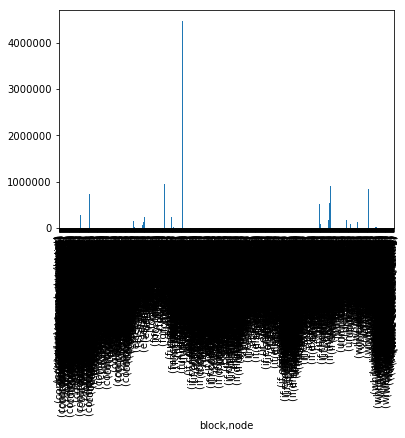

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
node_counts.plot.bar()

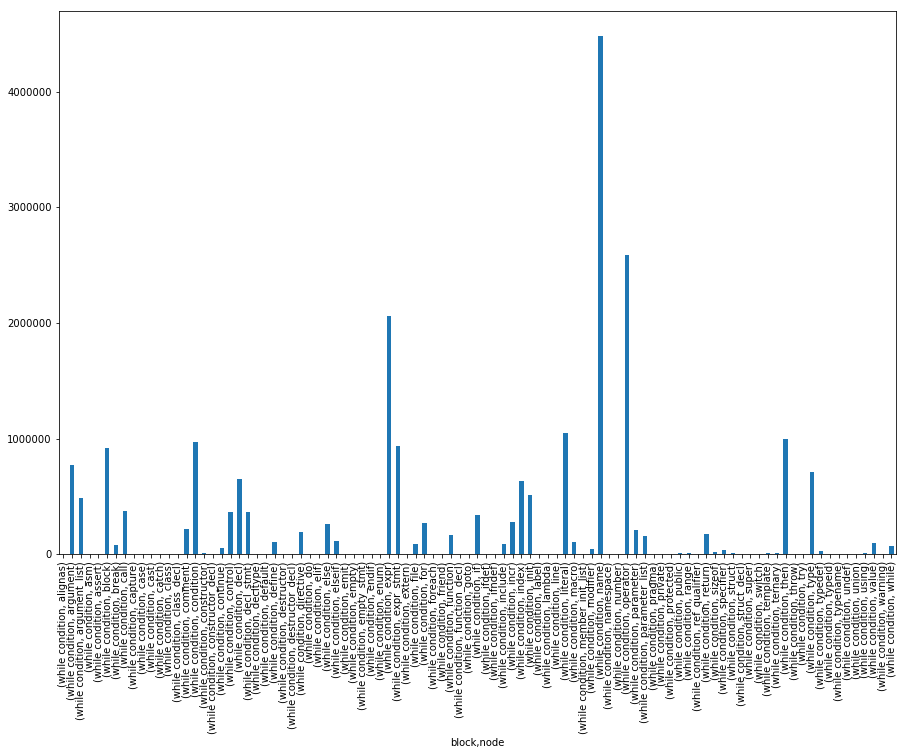

In [141]:
for column, counts in node_counts.groupby(level=[0]):
    counts.plot.bar(figsize=(15, 10))
    plt.savefig(column + '.pdf')

In [142]:
stacked = multiset.stack()
stacked[:, :, 'name']

prob  block            
101A  control condition     28.0
      control incr           7.0
      control init          12.0
      else                   3.0
      for                   25.0
      function              12.0
      if condition          39.0
      if else                0.0
      if then               34.0
      unit                  25.0
101B  control condition     31.0
      control incr          19.0
      control init          97.0
      else                 130.0
      for                  544.0
      function             836.0
      if condition         254.0
      if else                0.0
      if then              247.0
      unit                 204.0
      while                251.0
      while condition       89.0
101C  control condition     49.0
      control incr          32.0
      control init          41.0
      else                  13.0
      for                  178.0
      function             650.0
      if condition         298.0
      if else      

In [143]:
stacked[:, :, 'name'].sum()

19581573.0

In [144]:
stacked.sum()

65656434.0

In [145]:
import os
import pymysql

connection = pymysql.connect(host='localhost',
                            user=os.getenv('CF_DB_USER', 'root'),
                            password=os.getenv('MYSQL_PASS', 'pass'),
                            db=os.getenv('CF_DB', 'testcf'),
                            charset='utf8mb4',
                            cursorclass=pymysql.cursors.DictCursor)
connection.commit()
cur = connection.cursor()

In [146]:
cur.execute('show tables')
rows = cur.fetchall()
rows

[{'Tables_in_testcf': 'acceptance'},
 {'Tables_in_testcf': 'competition'},
 {'Tables_in_testcf': 'file'},
 {'Tables_in_testcf': 'modification'},
 {'Tables_in_testcf': 'participant'},
 {'Tables_in_testcf': 'participantsolved'},
 {'Tables_in_testcf': 'participantsubmission'},
 {'Tables_in_testcf': 'problem'},
 {'Tables_in_testcf': 'problemeditdistance'},
 {'Tables_in_testcf': 'problemstatistics'},
 {'Tables_in_testcf': 'submissiondistance'}]

In [148]:
import pandas.io.sql as sql
df = sql.read_sql('select * from modification limit 10', connection)
df

,idx,user_name,problem_id,file_name,node_type,parent_type,modification_type,during_competition,block_type
0,179747100100000,Tanmoy_26049,-,Tanmoy_26049_17974710_621.src,else,if,INS,0,None
1,179747100100001,Tanmoy_26049,-,Tanmoy_26049_17974710_621.src,block,else,INS,0,None
2,179747100100002,Tanmoy_26049,-,Tanmoy_26049_17974710_621.src,expr_stmt,block,INS,0,None
3,179747100100003,Tanmoy_26049,-,Tanmoy_26049_17974710_621.src,expr,expr_stmt,INS,0,None
4,179747100100004,Tanmoy_26049,-,Tanmoy_26049_17974710_621.src,name,expr,INS,0,None
5,179747100100005,Tanmoy_26049,-,Tanmoy_26049_17974710_621.src,operator,expr,INS,0,None
6,179747100100006,Tanmoy_26049,-,Tanmoy_26049_17974710_621.src,name,expr,INS,0,None
7,179747100100007,Tanmoy_26049,-,Tanmoy_26049_17974710_621.src,operator,expr,INS,0,None
8,179747100100008,Tanmoy_26049,-,Tanmoy_26049_17974710_621.src,name,expr,INS,0,None
9,179747490200000,Tanmoy_26049,-,Tanmoy_26049_17974749_621.src,decl_stmt,block,INS,0,None


In [151]:
df = sql.read_sql("select * from modification where user_name='.888'", connection)
df

,idx,user_name,problem_id,file_name,node_type,parent_type,modification_type,during_competition,block_type
0,189182050100000,.888,213B,.888_18918205_213.src,expr_stmt,block,INS,0,function
1,189182050100001,.888,213B,.888_18918205_213.src,macro,block,INS,0,function
2,189182050100002,.888,213B,.888_18918205_213.src,block,block,INS,0,function
3,189182050100003,.888,213B,.888_18918205_213.src,expr,expr_stmt,INS,0,function
4,189182050100004,.888,213B,.888_18918205_213.src,name,macro,INS,0,function
5,189182050100005,.888,213B,.888_18918205_213.src,argument_list,macro,INS,0,function
6,189182050100006,.888,213B,.888_18918205_213.src,macro,block,MOV,0,function
7,189182050100007,.888,213B,.888_18918205_213.src,block,block,INS,0,function
8,189182050100008,.888,213B,.888_18918205_213.src,name,expr,INS,0,function
9,189182050100009,.888,213B,.888_18918205_213.src,operator,expr,INS,0,function


In [157]:
df_sub = pd.DataFrame([df['user_name'], df['problem_id'], df['block_type'], df['node_type']]).T

In [158]:
df_sub

,user_name,problem_id,block_type,node_type
0,.888,213B,function,expr_stmt
1,.888,213B,function,macro
2,.888,213B,function,block
3,.888,213B,function,expr
4,.888,213B,function,name
5,.888,213B,function,argument_list
6,.888,213B,function,macro
7,.888,213B,function,block
8,.888,213B,function,name
9,.888,213B,function,operator


In [159]:
df_prob = sql.read_sql("select * from modification where problem_id='213B'", connection)

In [160]:
df_prob

,idx,user_name,problem_id,file_name,node_type,parent_type,modification_type,during_competition,block_type
0,181311090100000,pparwal12,213B,pparwal12_18131109_213.src,comment,unit,INS,0,None
1,181449760100000,behnood,213B,behnood_18144976_213.src,decl,decl_stmt,INS,0,None
2,181449760100001,behnood,213B,behnood_18144976_213.src,type,decl,INS,0,None
3,181449760100002,behnood,213B,behnood_18144976_213.src,name,decl,INS,0,None
4,181449760100003,behnood,213B,behnood_18144976_213.src,for,block,INS,0,None
5,181449760100004,behnood,213B,behnood_18144976_213.src,comment,block,INS,0,None
6,181449760100005,behnood,213B,behnood_18144976_213.src,name,name,INS,0,None
7,181449760100006,behnood,213B,behnood_18144976_213.src,index,name,INS,0,None
8,181449760100007,behnood,213B,behnood_18144976_213.src,decl,decl_stmt,INS,0,None
9,181449760100008,behnood,213B,behnood_18144976_213.src,control,for,INS,0,None
